# Icaro - Compressor

- **Created by Andrés Segura Tinoco**  
- **Created on June 17, 2019**

In [1]:
# Load Python libraries
import io
import numpy as np
from PIL import Image

In [2]:
# Load Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading an example image
file_path = "../data/img/example-1.png"
img = Image.open(file_path)

In [4]:
# Show image dimension (resolution)
img.size

(1920, 1080)

In [5]:
# Show image extension
img.format

'PNG'

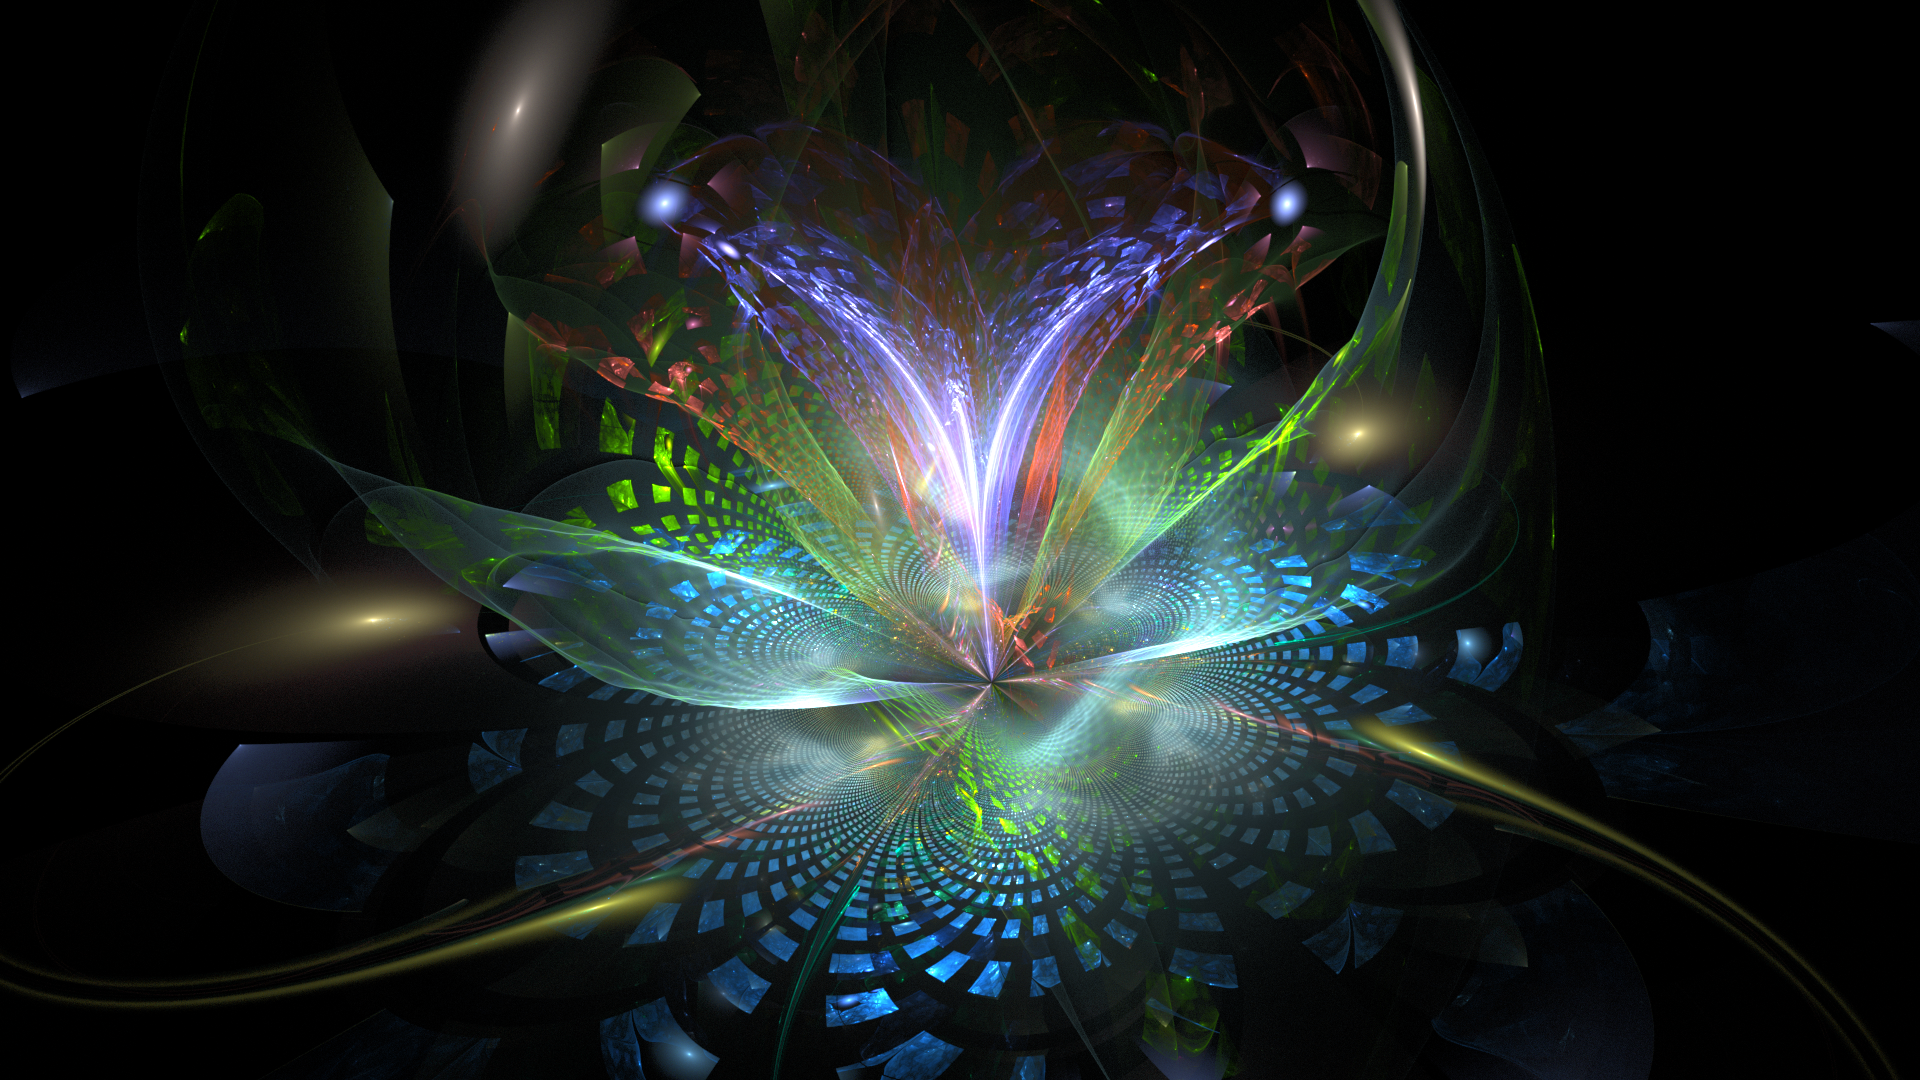

In [6]:
# Show image
img

In [7]:
# Read file in low level (bit list)
with open(file_path, 'rb') as f:
    low_byte_list = bytearray(f.read())

In [8]:
# Show size (KB)
round(len(low_byte_list) / 1024, 2)

2728.96

In [9]:
# Show size (MB)
round(len(low_byte_list) / 1024 / 1020, 2)

2.68

In [10]:
# Create a matrix
row_len = 2232
col_len = 1252
matrix = np.zeros((row_len, col_len))
matrix.shape

(2232, 1252)

In [11]:
# Calculate additional bits
gap = np.prod(matrix.shape) - len(low_byte_list)
gap

6

In [12]:
# Save bytes into matrix
data = np.array(low_byte_list)
for i in range(0, len(data)):
    ix_row = int(i / col_len)
    ix_col = i % col_len
    matrix[ix_row][ix_col] = data[i]

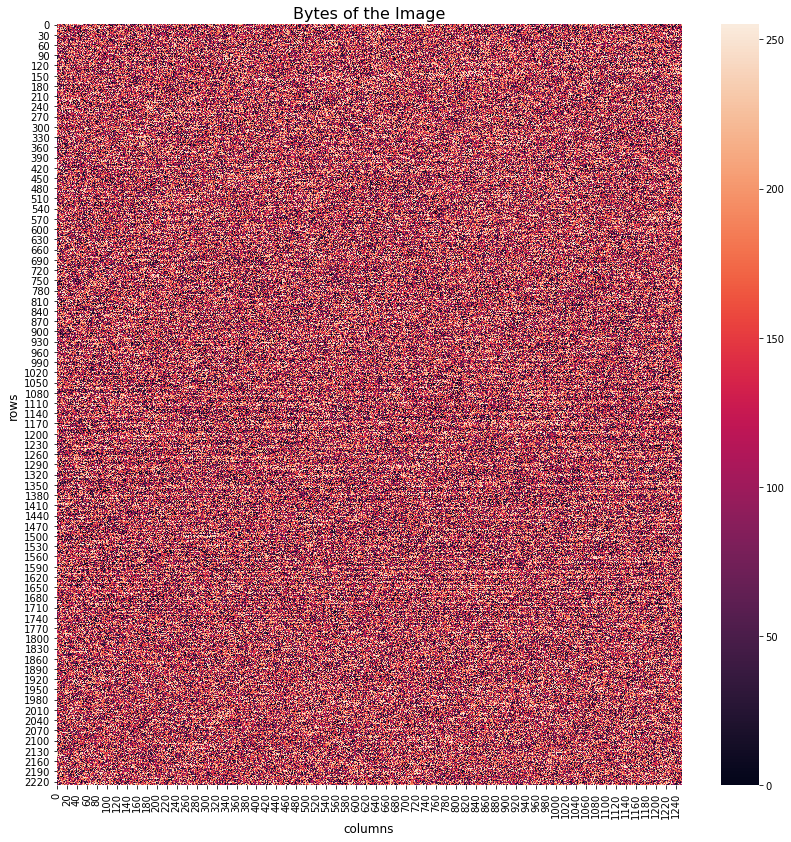

In [13]:
# Plot image in binary
fig, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(matrix, ax = ax)
ax.set_title("Bytes of the Image", fontsize = 16)
ax.set_xlabel('columns', fontsize = 12)
ax.set_ylabel('rows', fontsize = 12)
plt.show()

In [14]:
# Create a new image
file_path = "../data/img/example-2.png"
new_img = Image.open(io.BytesIO(low_byte_list))
new_img.save(file_path)

<hr>
<p><a href="https://github.com/ansegura7/Icaro/">« Home</a></p>